In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv("C:/Users/ching/Desktop/walmart_data/preprocess/train_df_pre.csv")

In [5]:
train_df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Category,Operation_Years
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,21
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,11
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,21
3,3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,22
4,4,NCD19,8.93,Non-Edible,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,33


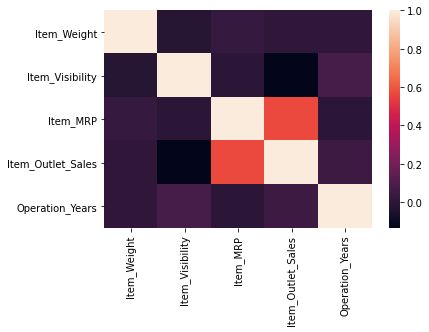

In [7]:
corr = train_df[['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales','Operation_Years']].corr(method='pearson')
sns.heatmap(corr)

**數值型資料之相關性狀況**
* 可見度和銷售量是負相關 ==> 推測是資料型態未有時序型之變化，因此相關性看不出來影響
* 類別中品項最高價與銷售量是正相關

In [9]:
def relations(x):
    Outlet_Identifier_Pivot = train_df.pivot_table(index=x, values='Item_Outlet_Sales', aggfunc=np.median)
    Outlet_Identifier_Pivot.plot(kind='bar')
    plt.xlabel(x)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

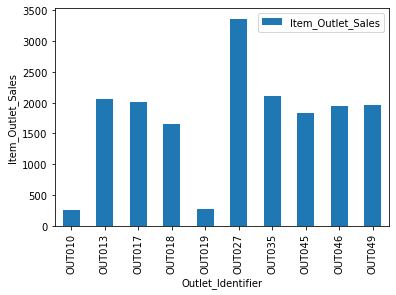

In [10]:
relations('Outlet_Identifier')

In [11]:
train_df.pivot_table(values='Outlet_Type', columns='Outlet_Identifier', aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [12]:
train_df.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


* 銷售量最好的是，第out027店，屬於設立在第三級城市的超市

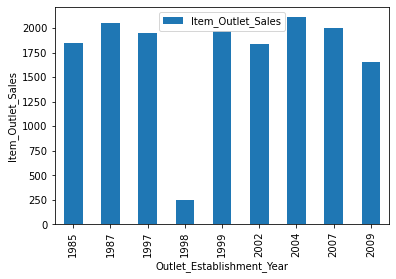

In [13]:
relations('Outlet_Establishment_Year')

**通路設立年份和銷售量看起來是沒什麼關係

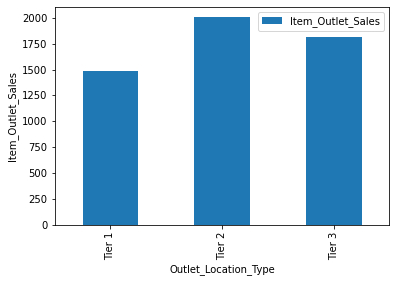

In [14]:
relations('Outlet_Location_Type')

In [15]:
train_df.pivot_table(values='Outlet_Type', columns='Outlet_Location_Type', aggfunc=lambda x:x.mode())

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,Supermarket Type1,Supermarket Type1,Supermarket Type3


**從Outlet_Location_Type來看，銷售量最好的是，設在2級城市最好

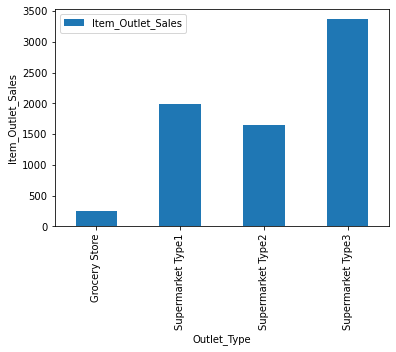

In [17]:
relations('Outlet_Type')

**從Outlet_Type來看，銷售量最好的是，設在第3種超市型態最好

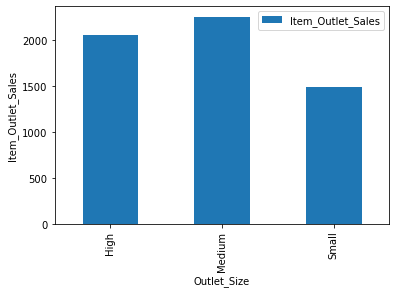

In [19]:
relations('Outlet_Size')

**從Outlet_Size來看，銷售量最好的是，設在中型店最好

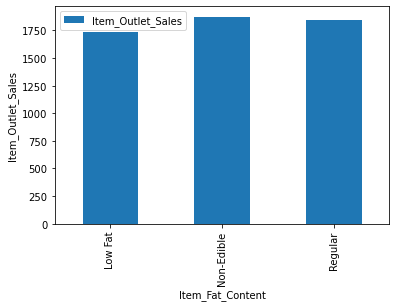

In [20]:
relations('Item_Fat_Content')

**從Item_Fat_Content來看，一般脂肪與低脂的銷售量沒有差別很大

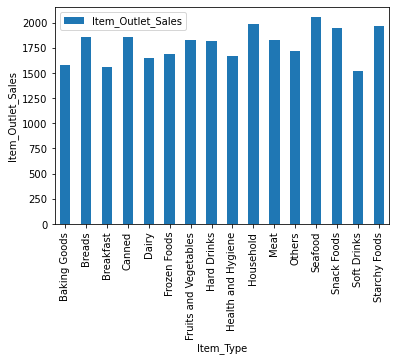

In [22]:
relations('Item_Type')

**從Item_Type來看，銷售量前四名是：Seafood、household、Starchyfoods(澱粉食物)、Snackfoods

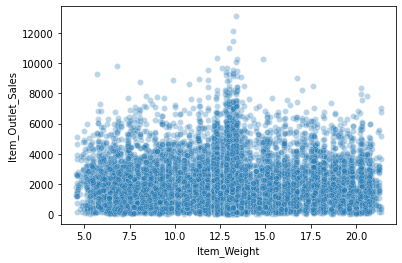

In [23]:
sns.scatterplot(data=train_df, x='Item_Weight', y='Item_Outlet_Sales', alpha=0.3)

**產品重量對銷售影響很小

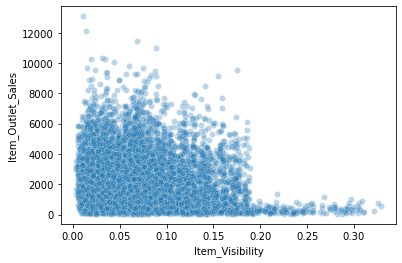

In [24]:
sns.scatterplot(data=train_df, x='Item_Visibility', y='Item_Outlet_Sales', alpha=0.3)

**可見度越高，並不會讓銷售量更高
**負相關

==> 推測是資料型態未有時序型之變化，因此相關性看不出來影響